# CIFAR10 dataset on the Artificial Neural Network

## Importing Libraries

In [ ]:
from compvis.ann import ANN
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


## Loading the CIFAR10 dataset from Scikit-Learn

In [ ]:
((X_train, y_train), (X_test, y_test)) = cifar10.load_data()

## Splitting the dataset into training and test set

In [ ]:
X_train = X_train.astype("float")/255. # Normalizing
X_test = X_test.astype("float")/255.
X_train = X_train.reshape((X_train.shape[0], 3072)) #reshaping
X_test = X_test.reshape((X_test.shape[0], 3072))

**Label binarize to transform labels into numbers**

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

## Creating the model

In [ ]:
ann = ANN([X_train.shape[1], 32, 16, 10], alpha=0.01)

In [ ]:
print(ann)

### Training the model

In [ ]:
ann.fit(X_train, y_train, epochs = 100, verbose=10)

In [ ]:
predictions = model.predict(X_test)

[INFO] loading the CIFAR 10 dataset...
[INFO] training the model
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 98us/sample - loss: 1.8393 - accuracy: 0.3445 - val_loss: 1.7153 - val_accuracy: 0.3835
Epoch 2/100
50000/50000 [==============================] - 4s 80us/sample - loss: 1.6540 - accuracy: 0.4143 - val_loss: 1.6294 - val_accuracy: 0.4287
Epoch 3/100
50000/50000 [==============================] - 4s 80us/sample - loss: 1.5720 - accuracy: 0.4479 - val_loss: 1.6913 - val_accuracy: 0.3987
Epoch 4/100
50000/50000 [==============================] - 4s 83us/sample - loss: 1.5129 - accuracy: 0.4664 - val_loss: 1.5202 - val_accuracy: 0.4548
Epoch 5/100
50000/50000 [==============================] - 4s 83us/sample - loss: 1.4652 - accuracy: 0.4852 - val_loss: 1.4717 - val_accuracy: 0.4751
Epoch 6/100
50000/50000 [==============================] - 4s 81us/sample - loss: 1.4253 - accuracy: 0.4965 - val_loss: 1.4436 - val_ac

50000/50000 [==============================] - 4s 78us/sample - loss: 0.3968 - accuracy: 0.8704 - val_loss: 1.5781 - val_accuracy: 0.5542
Epoch 55/100
50000/50000 [==============================] - 4s 79us/sample - loss: 0.3794 - accuracy: 0.8771 - val_loss: 1.5829 - val_accuracy: 0.5564
Epoch 56/100
50000/50000 [==============================] - 4s 80us/sample - loss: 0.3626 - accuracy: 0.8838 - val_loss: 1.6287 - val_accuracy: 0.5458
Epoch 57/100
50000/50000 [==============================] - 4s 79us/sample - loss: 0.3469 - accuracy: 0.8889 - val_loss: 1.7850 - val_accuracy: 0.5294
Epoch 58/100
50000/50000 [==============================] - 4s 78us/sample - loss: 0.3375 - accuracy: 0.8922 - val_loss: 1.7191 - val_accuracy: 0.5516
Epoch 59/100
50000/50000 [==============================] - 4s 78us/sample - loss: 0.3197 - accuracy: 0.8985 - val_loss: 1.7503 - val_accuracy: 0.5365
Epoch 60/100
50000/50000 [==============================] - 4s 79us/sample - loss: 0.3034 - accuracy: 0.904

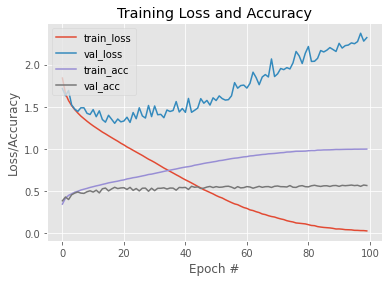

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Loading the CIFAR 10 dataset

print("[INFO] loading the CIFAR 10 dataset...")
((X_train, y_train), (X_test, y_test)) = cifar10.load_data()

# Normalize and reshape for the features variables

X_train = X_train.astype("float")/255. # Normalizing
X_test = X_test.astype("float")/255.
X_train = X_train.reshape((X_train.shape[0], 3072)) #reshaping
X_test = X_test.reshape((X_test.shape[0], 3072))

## Encoding the target

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

# Creating a list with labeled targets

labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
              "horse", "ship", "truck"]

# Contructing the Sequential model 3072-1024-512-10

model = Sequential() # To create the network
model.add(Dense(1024, input_shape=(3072, ), activation="relu")) # To connect the input layer with the first hidden layer
model.add(Dense(512, activation="relu")) # To connect the first hidden layer with the second hidden layer
model.add(Dense(10, activation="softmax")) # To connect the second hidden layer with the output layer

## Training the ANN
print("[INFO] training the model")

sgd = SGD(0.01) # to optimizer the model 
# compiling the model
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"]) # compiling the model
# Fitting the model
H = model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs = 100, batch_size=32)

# Evaluating the ANN
print("[INFO] evaluating the ANN...")
predictions = model.predict(X_test, batch_size=32)
# Classification report
cr = classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1),
                           target_names = labelNames)
print(cr)

# plotting the training loss and accuracy

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("loss_acc_ann_cifar10.jpg")